# IMPORTING NECCESSARY LIBRARY

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")





# READ DATASET

In [3]:
#  Load data from a CSV file
data = pd.read_csv("engineering colleges in India.csv")

In [4]:
# HEAD : FOR PRINTING FIRST FIVE ROW
data.head()

,College Name,Genders Accepted,Campus Size,Total Student Enrollments,Total Faculty,Established Year,Rating,University,Courses,Facilities,City,State,Country,College Type,Average Fees
0,National Institute of Technology Rourkela,Co-Ed,647 Acres,4811,329,2007,3.12,NaN,"B.Tech Mechanical Engineering, B.Tech Computer...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Rourkela,Odisha,India,Public/Government,350600.0
1,Visvesvaraya National Institute of Technology ...,Co-Ed,215 Acres,1071,192,2007,NaN,NaN,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Nagpur,Maharashtra,India,Public/Government,273596.6666666667
2,Netaji Subhas University of Technology,Co-Ed,145 Acres,3759,101,2018,NaN,NaN,"B.Tech Computer Engineering, B.Tech Electronic...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",New Delhi,Delhi,India,Public/Government,352320.0
3,Birla Institute of Technology,Co-Ed,980 Acres,4506,284,1955,NaN,NaN,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Ranchi,Jharkhand,India,Private,596686.0465116279
4,International Institute of Information Technology,Co-Ed,66 Acres,1721,85,2001,3.05,NaN,"B.Tech Computer Science and Engineering, M.Tec...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Hyderabad,Telangana,India,Private,756666.6666666666


In [5]:
# TAIL:FOR PRINTING LAST FIVE ROWS
data.tail()


,College Name,Genders Accepted,Campus Size,Total Student Enrollments,Total Faculty,Established Year,Rating,University,Courses,Facilities,City,State,Country,College Type,Average Fees
5441,BES Institute of Technology,Co-Ed,4 Acres,NaN,31,2003,NaN,NaN,"Diploma in Civil Engineering, Diploma in Compu...","Girls Hostel, Library, Sports, Cafeteria, Audi...",Bengaluru,Karnataka,India,Private,38490.0
5442,Radical Polytechnic College,Co-Ed,NaN,NaN,NaN,2013,NaN,NaN,"Diploma in Civil Engineering, Diploma in Mecha...","Boys Hostel, Girls Hostel, Library, Sports, Wi...",Amritsar,Punjab,India,Private,75100.0
5443,Trimurti Institute of Technology Polytechnic,Co-Ed,NaN,22,55,2009,NaN,NaN,"Diploma in Electrical Engineering, Diploma in ...","Library, Sports, IT Infrastructure, Laboratories",Paldhi,Maharashtra,India,Private,157000.0
5444,RV Parankar College of Engineering and Technology,Co-Ed,NaN,38,10,2015,NaN,Rashtrasant Tukadoji Maharaj Nagpur University...,"BE Civil Engineering, BE Electrical Engineerin...","Library, Sports, Cafeteria, Auditorium, IT Inf...",Arvi,Maharashtra,India,Private,272000.0
5445,Centre for Design Excellence,Co-Ed,NaN,NaN,20,NaN,NaN,"Vivekananda Global University, Jaipur","B.Arch, B.Des Fashion and Textile Design, B.De...","Boys Hostel, Girls Hostel, Library, Sports, Au...",Jaipur,Rajasthan,India,Private,897500.0


# DATA PREPROCESSING

In [6]:
#SHAPE ( ROWS & COLUMNS )
data.shape

(5446, 15)

In [7]:
#INFO
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5446 entries, 0 to 5445
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   College Name               5446 non-null   object
 1   Genders Accepted           5428 non-null   object
 2   Campus Size                2695 non-null   object
 3   Total Student Enrollments  4443 non-null   object
 4   Total Faculty              5285 non-null   object
 5   Established Year           5345 non-null   object
 6   Rating                     333 non-null    object
 7   University                 3510 non-null   object
 8   Courses                    5446 non-null   object
 9   Facilities                 5434 non-null   object
 10  City                       5446 non-null   object
 11  State                      5446 non-null   object
 12  Country                    5446 non-null   object
 13  College Type               5445 non-null   object
 14  Average 

In [8]:
#FINDING DUPLICATE
print(data.duplicated().sum())

# Remove duplicate rows
data = data.drop_duplicates()


5


In [9]:
#FINDING MISSING VALUES
data.isnull().sum()


College Name                    0
Genders Accepted               18
Campus Size                  2751
Total Student Enrollments    1003
Total Faculty                 161
Established Year              101
Rating                       5113
University                   1936
Courses                         0
Facilities                     12
City                            0
State                           0
Country                         0
College Type                    1
Average Fees                    0
dtype: int64

In [10]:
#FINDING MISSING VALUES %
data.isnull().sum()/data.shape[0]*100

College Name                  0.000000
Genders Accepted              0.330822
Campus Size                  50.560559
Total Student Enrollments    18.434111
Total Faculty                 2.959015
Established Year              1.856276
Rating                       93.971696
University                   35.581695
Courses                       0.000000
Facilities                    0.220548
City                          0.000000
State                         0.000000
Country                       0.000000
College Type                  0.018379
Average Fees                  0.000000
dtype: float64

In [11]:
# For columns with  high percentage of missing values, consider dropping the column
data.drop(columns=["Rating","Campus Size"], inplace=True)

In [12]:
#checking the total number of columns after removing the unecessary columns from dataset
data.columns

Index(['College Name', 'Genders Accepted', 'Total Student Enrollments',
       'Total Faculty', 'Established Year', 'University', 'Courses',
       'Facilities', 'City', 'State', 'Country', 'College Type',
       'Average Fees'],
      dtype='object')

In [13]:
# List of columns to convert to numeric
columns_to_convert = ['Total Student Enrollments', 'Total Faculty', 'Established Year','Average Fees']

# Convert columns to numeric ,setting errors='coerce' to handle non-numeric values
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [14]:
data.describe()

,Total Student Enrollments,Total Faculty,Established Year,Average Fees
count,4.437000e+03,5279.000000,5339.000000,5.440000e+03
mean,1.915446e+03,96.739345,2000.425548,1.886011e+05
std,1.841858e+04,113.869962,16.203044,1.807647e+05
min,1.000000e+00,1.000000,1857.000000,1.800000e+02
25%,4.090000e+02,37.000000,1998.000000,9.000000e+04
50%,8.120000e+02,69.000000,2007.000000,1.590000e+05
75%,1.551000e+03,124.000000,2009.000000,2.400000e+05
max,1.035081e+06,2453.000000,2019.000000,3.578597e+06


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5441 entries, 0 to 5445
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   College Name               5441 non-null   object 
 1   Genders Accepted           5423 non-null   object 
 2   Total Student Enrollments  4437 non-null   float64
 3   Total Faculty              5279 non-null   float64
 4   Established Year           5339 non-null   float64
 5   University                 3505 non-null   object 
 6   Courses                    5441 non-null   object 
 7   Facilities                 5429 non-null   object 
 8   City                       5441 non-null   object 
 9   State                      5441 non-null   object 
 10  Country                    5441 non-null   object 
 11  College Type               5440 non-null   object 
 12  Average Fees               5440 non-null   float64
dtypes: float64(4), object(9)
memory usage: 595.1+ KB

In [16]:
# Fill NaN values in categorical columns with "NA" 
categorical_columns = ['Genders Accepted', 'University', 'College Type']
for column in categorical_columns:
    data[column] = data[column].fillna('NA')

# Fill NaN values in numerical columns with 0
numerical_columns = ['Total Student Enrollments', 'Total Faculty', 'Established Year','Average Fees']
for column in numerical_columns:
    data[column] = data[column].fillna(0)

# Fill NaN values in 'Facilities' with "Unknown"

data['Facilities'] = data['Facilities'].fillna('Unknown')

In [17]:
#FINDING MISSING VALUES AFTER REPLACING THEM
data.isnull().sum()


College Name                 0
Genders Accepted             0
Total Student Enrollments    0
Total Faculty                0
Established Year             0
University                   0
Courses                      0
Facilities                   0
City                         0
State                        0
Country                      0
College Type                 0
Average Fees                 0
dtype: int64

In [18]:
#CHECKING FOR UNWANTED VALUE IN ROWS
data[data['College Type']=='College Type']

,College Name,Genders Accepted,Total Student Enrollments,Total Faculty,Established Year,University,Courses,Facilities,City,State,Country,College Type,Average Fees
597,College Name,Genders Accepted,0.0,0.0,0.0,University,Courses,Facilities,City,State,Country,College Type,0.0


In [19]:
#DROPING THE UNWANTED ROW IN DATASET
data.drop(index=597,inplace=True)

In [20]:
#GET GENDER ACCEPTED BY NUMBER OF COLLEGES
data['Genders Accepted'].value_counts()

Co-Ed           5243
Female           169
NA                18
Male               9
Co-Ed5666656       1
Name: Genders Accepted, dtype: int64

In [21]:
#REPLACING UNWANTED VALUES WITH CORRECT ONES
data.replace("Co-Ed5666656","Co-Ed",inplace=True)

In [22]:
#FINDING THE SHAPE AFTER PRE PROCESSING
data.shape

(5440, 13)

In [23]:
#IMPORTING CLEANED DATASET 
data.to_csv('cleaned_engineering_colleges_in_India.csv', index=False, )

# DATA ANALYSIS & VISUALIZATION

In [24]:
#SORT DATA ON THE BASICS OF ESTABLISHED YEAR
data.sort_values(by='Established Year').reset_index(drop=True)

,College Name,Genders Accepted,Total Student Enrollments,Total Faculty,Established Year,University,Courses,Facilities,City,State,Country,College Type,Average Fees
0,Centre for Design Excellence,Co-Ed,0.0,20.0,0.0,"Vivekananda Global University, Jaipur","B.Arch, B.Des Fashion and Textile Design, B.De...","Boys Hostel, Girls Hostel, Library, Sports, Au...",Jaipur,Rajasthan,India,Private,897500.000000
1,BKR College of Engineering and Technology,NA,0.0,0.0,0.0,NA,"BE Electronics and Communication Engineering, ...",Unknown,Thiruthani,Tamil Nadu,India,Private,147500.000000
2,Vardey Devi Institute of Engineering and Techn...,Co-Ed,0.0,85.0,0.0,"Kurukshetra University, Kurukshetra","B.Tech Electrical and Electronics Engineering,...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Julana,Haryana,India,Private,177444.444444
3,Forth Dimension College of Architecture,NA,0.0,15.0,0.0,"Dr APJ Abdul Kalam Technical University, Lucknow",B.Arch,"Library, Wifi, IT Infrastructure, Laboratories",Chhutmalpur,Uttar Pradesh,India,Private,225000.000000
4,Sri Krishna Polytechnic,Co-Ed,288.0,34.0,0.0,NA,"Diploma in Mechanical Engineering, Diploma in ...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Bengaluru,Karnataka,India,Private,60000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,Acharya Polytechnic,Co-Ed,1591.0,122.0,2018.0,NA,"Diploma in Aeronautical Engineering, Diploma i...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Bengaluru,Karnataka,India,Private,98250.000000
5436,Drona's Polytechnic College,Co-Ed,136.0,12.0,2018.0,NA,"Diploma in Civil Engineering, Diploma in Compu...","Boys Hostel, Girls Hostel, Library, IT Infrast...",Dehradun,Uttarakhand,India,Private,105000.000000
5437,Manda Institute of Technology,Co-Ed,133.0,99.0,2018.0,"Bikaner Technical University, Bikaner","B.Tech Electrical Engineering, B.Tech Civil En...","Boys Hostel, Girls Hostel, Library, Sports, Ca...",Bikaner,Rajasthan,India,Private,253545.454545
5438,Netaji Subhas University of Technology,Co-Ed,3759.0,101.0,2018.0,NA,"B.Tech Computer Engineering, B.Tech Electronic...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",New Delhi,Delhi,India,Public/Government,352320.000000


In [25]:
#FINDING THE COLLEGE WITH MOST STUDENT ENROLLMENTS
data[data['Total Student Enrollments']==1035081.0]

,College Name,Genders Accepted,Total Student Enrollments,Total Faculty,Established Year,University,Courses,Facilities,City,State,Country,College Type,Average Fees
197,Indira Gandhi National Open University,Co-Ed,1035081.0,248.0,1985.0,NA,"B.Sc Hospitality and Hotel Administration, B.S...","Library, Cafeteria, Auditorium, Medical/Hospit...",New Delhi,Delhi,India,Public/Government,57191.803279


In [26]:
#GET THE UNIVERSITY BY NUMBER OF COLLEGES
data['University'].value_counts().head(10).reset_index()

,index,University
0,NA,1936
1,"Anna University, Chennai",511
2,"Dr APJ Abdul Kalam Technical University, Lucknow",282
3,"Jawaharlal Nehru Technological University, Hyd...",245
4,"Rajiv Gandhi Proudyogiki Vishwavidyalaya, Bhopal",208
5,"Jawaharlal Nehru Technological University, Kak...",193
6,"Gujarat Technological University, Ahmedabad",189
7,"Visvesvaraya Technological University, Belagavi",178
8,"APJ Abdul Kalam Technological University, Thir...",149
9,"Savitribai Phule Pune University, Pune",128


In [27]:
# Get the Genders Accepted by  Total Number of Student Enrollments
a=data.groupby('Genders Accepted')['Total Student Enrollments'].sum()
a

Genders Accepted
Co-Ed     8365258.0
Female     126103.0
Male         5590.0
NA           1883.0
Name: Total Student Enrollments, dtype: float64

In [28]:
# Get the Genders Accepted by number of colleges
data['Genders Accepted'].value_counts().reset_index()

,index,Genders Accepted
0,Co-Ed,5244
1,Female,169
2,NA,18
3,Male,9


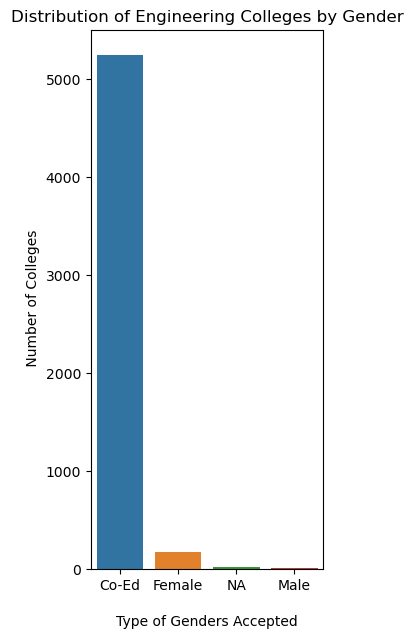

In [29]:
# Distribution of colleges by Genders Accepted
plt.figure(figsize=(3, 7))
sns.countplot(data=data, x='Genders Accepted')
plt.title('Distribution of Engineering Colleges by Gender')
plt.xlabel('\nType of Genders Accepted')
plt.ylabel('\n Number of Colleges')
plt.show()

In [30]:
# Get the College Type by number of colleges
data['College Type'].value_counts().reset_index()

,index,College Type
0,Private,4474
1,Public/Government,965
2,NA,1


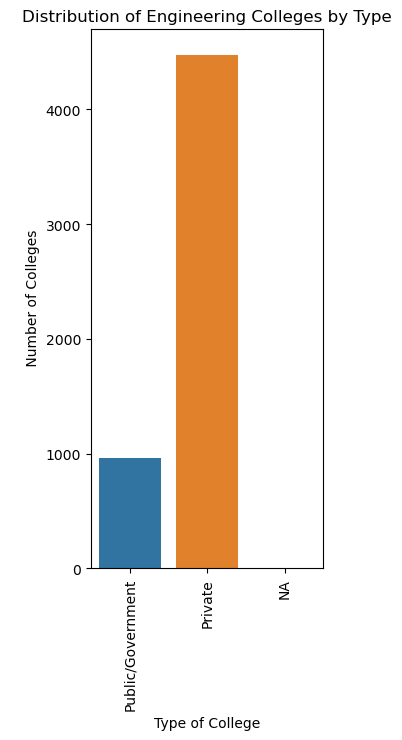

In [31]:
# Distribution of colleges by College Type
plt.figure(figsize=(3, 7))
sns.countplot(data=data, x='College Type')
plt.title('Distribution of Engineering Colleges by Type')
plt.xlabel('Type of College')
plt.ylabel('\n Number of Colleges')
plt.xticks(rotation=90)
plt.show()

In [32]:
# Get the states by number of colleges
data['State'].value_counts().reset_index()

,index,State
0,Tamil Nadu,834
1,Maharashtra,712
2,Uttar Pradesh,502
3,Andhra Pradesh,386
4,Karnataka,339
5,Telangana,312
6,Haryana,263
7,Madhya Pradesh,261
8,Gujarat,241
9,Rajasthan,239


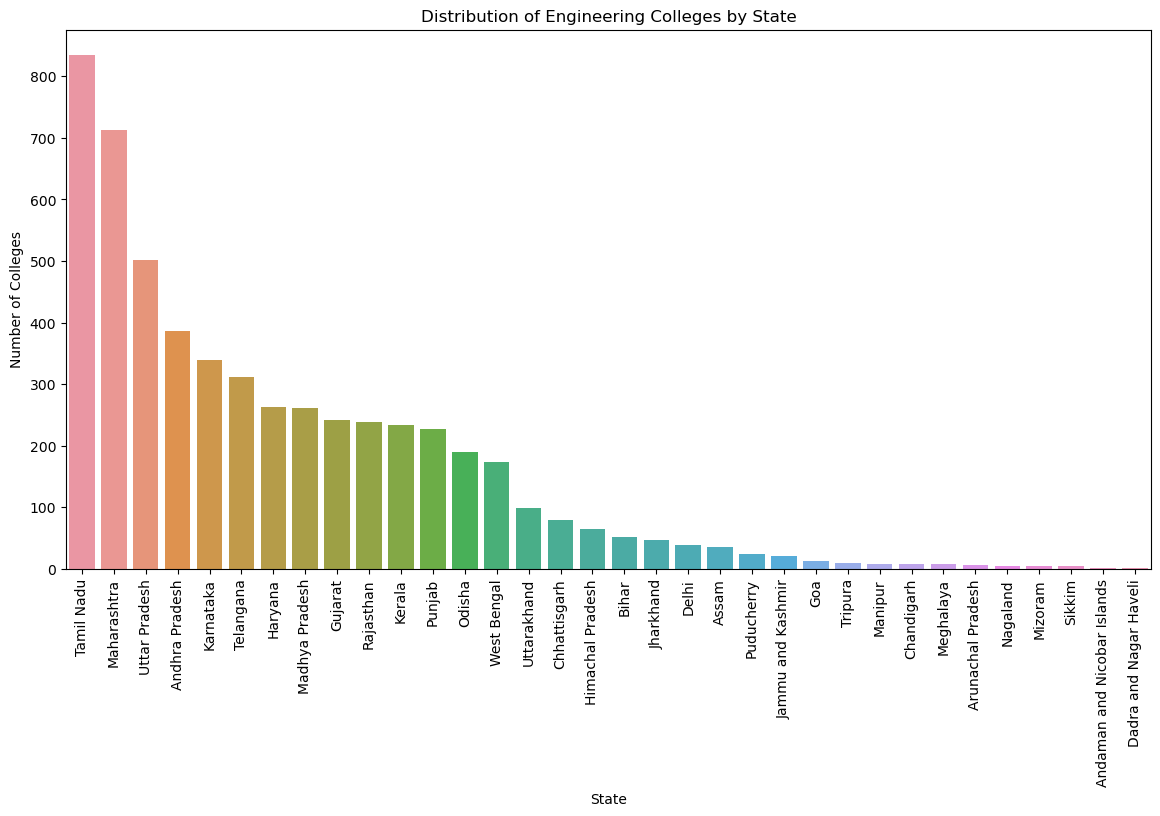

In [33]:
# Distribution of colleges by state
plt.figure(figsize=(14, 7))
sns.countplot(data=data, x='State', order=data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Engineering Colleges by State')
plt.xlabel('State')
plt.ylabel('Number of Colleges')
plt.show()

In [34]:
# Get the top 10 states by number of colleges
state_counts = data['State'].value_counts().head(10)
state_counts 


Tamil Nadu        834
Maharashtra       712
Uttar Pradesh     502
Andhra Pradesh    386
Karnataka         339
Telangana         312
Haryana           263
Madhya Pradesh    261
Gujarat           241
Rajasthan         239
Name: State, dtype: int64

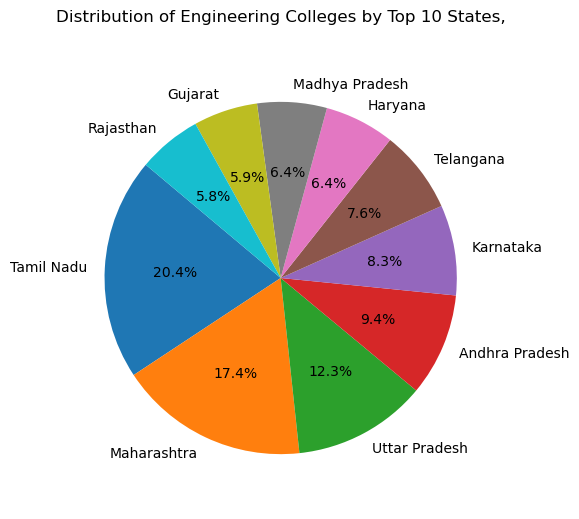

In [35]:
#UNIVARIATE ANALYSIS
# Plot pie chart for top 10 states
plt.figure(figsize=(5, 6))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab10", 10))
plt.title('Distribution of Engineering Colleges by Top 10 States,\n')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [36]:
# Get the top 10 city by number of colleges
city_count=data['City'].value_counts().head(10)
city_count

Hyderabad     117
Bengaluru     106
Pune           91
Chennai        83
Bhopal         80
Jaipur         62
Coimbatore     57
Mumbai         56
Kolkata        51
Lucknow        46
Name: City, dtype: int64

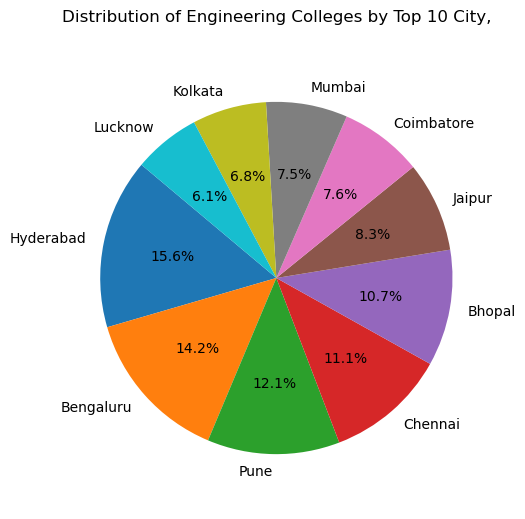

In [37]:
#UNIVARIATE ANALYSIS
# Plot pie chart for top 10 city
plt.figure(figsize=(5, 6))
plt.pie(city_count, labels=city_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab10", 10))
plt.title('Distribution of Engineering Colleges by Top 10 City,\n')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [38]:
# Get the top 10 years when most colleges are established
year_counts = data['Established Year'].value_counts().reset_index()
year_counts.columns = ['Year', 'Count']
top_10_years = year_counts.head(10)
top_10_years 

,Year,Count
0,2008.0,683
1,2009.0,651
2,2010.0,418
3,2007.0,294
4,2001.0,246
5,2011.0,226
6,2002.0,178
7,2012.0,176
8,2006.0,172
9,1998.0,141


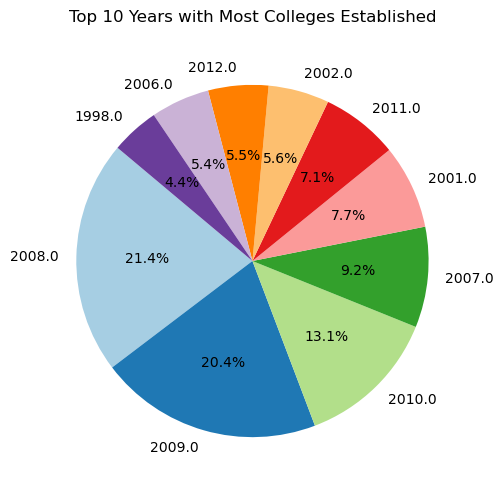

In [39]:
#UNIVARIATE ANALYSIS
# Plotting the pie chart for top 10 established years
plt.figure(figsize=(5, 6))
plt.pie(top_10_years['Count'], labels=top_10_years['Year'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Years with Most Colleges Established')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

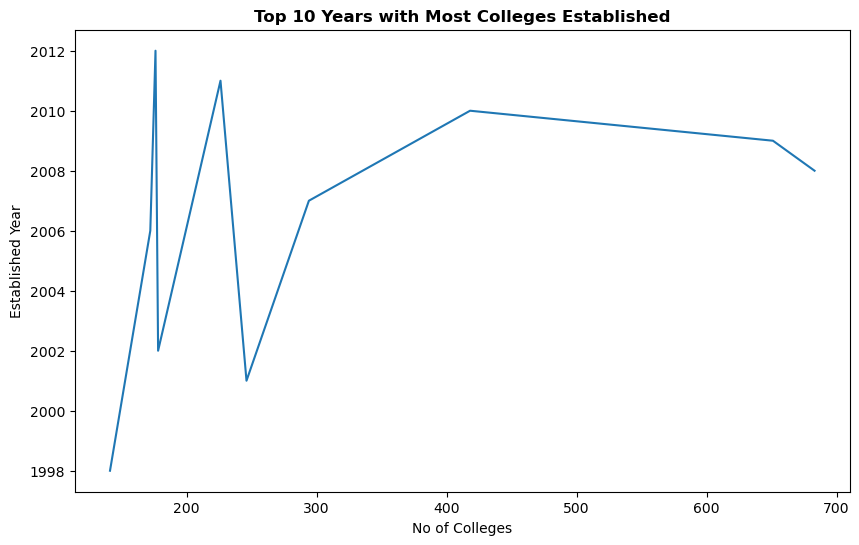

In [40]:
#UNIVARIATE ANALYSIS
# Plotting the line graph for top 10 years 
plt.figure(figsize=(10, 6))
plt.plot(top_10_years['Count'], top_10_years['Year'])
plt.title('Top 10 Years with Most Colleges Established',fontweight='bold')
plt.ylabel('Established Year')
plt.xlabel('No of Colleges')
plt.show()

In [41]:
# Select the first 10 universities according to the average fee it takes (lowest to highest fee )
subset_data = data.sort_values(by='Average Fees').head(10).reset_index()
subset_data

,index,College Name,Genders Accepted,Total Student Enrollments,Total Faculty,Established Year,University,Courses,Facilities,City,State,Country,College Type,Average Fees
0,2244,Government Polytechnic,Co-Ed,765.0,7.0,1924.0,NA,"Diploma in Civil Engineering, Diploma in Compu...","Boys Hostel, Girls Hostel, Library, Sports, IT...",Muzaffarpur,Bihar,India,Public/Government,180.000000
1,4206,Government Polytechnic,Co-Ed,666.0,5.0,2011.0,NA,"Diploma in Civil Engineering, Diploma in Elect...","Boys Hostel, Girls Hostel, Library, Sports, Me...",Katihar,Bihar,India,Public/Government,195.000000
2,1591,Government Polytechnic For Girls,Female,1454.0,81.0,1964.0,"Gujarat Technological University, Ahmedabad","Diploma in Computer Engineering, Diploma in El...","Library, Sports, Cafeteria, IT Infrastructure,...",Ahmedabad,Gujarat,India,Public/Government,300.000000
3,3716,Government Polytechnic College,Co-Ed,131.0,7.0,2010.0,"Rajiv Gandhi Proudyogiki Vishwavidyalaya, Bhopal","Diploma in Computer Science Engineering, Diplo...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Mandsaur,Madhya Pradesh,India,Public/Government,660.000000
4,3767,Arambagh Government Polytechnic,Male,206.0,9.0,2016.0,NA,"Diploma in Civil Engineering, Diploma in Elect...","Boys Hostel, Library, Sports, Auditorium, IT I...",Arambagh,West Bengal,India,Public/Government,1800.000000
5,4152,Purulia Polytechnic,Co-Ed,1037.0,25.0,1956.0,NA,"Diploma in Civil Engineering, Diploma in Elect...","Boys Hostel, Girls Hostel, Library, Sports, Au...",Purulia,West Bengal,India,Public/Government,1800.000000
6,3769,Central Footwear Training Centre,Co-Ed,284.0,1.0,1996.0,NA,"Diploma in Footwear Technology, Diploma in Lea...","Boys Hostel, Girls Hostel, Library, Sports, Ca...",Achipur,West Bengal,India,Public/Government,1800.000000
7,3102,Government Girls Polytechnic,Female,648.0,29.0,1987.0,Chhattisgarh Swami Vivekanand Technical Univer...,"Diploma in Computer Science Engineering, Diplo...","Girls Hostel, Gym, Library, Sports, Cafeteria,...",Raipur,Chhattisgarh,India,Public/Government,1847.142857
8,1105,Sree Ramkrishna Silpa Vidyapith,Co-Ed,639.0,17.0,1953.0,NA,"D.Pharma, Diploma in Civil Engineering, Diplom...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Suri,West Bengal,India,Public/Government,1932.500000
9,4962,Annai Velankanni Polytechnic College,Co-Ed,1112.0,60.0,1986.0,NA,Diploma in Electrical and Electronics Engineer...,"Boys Hostel, Girls Hostel, Gym, Library, Sport...",Salem,Tamil Nadu,India,Private,2180.000000


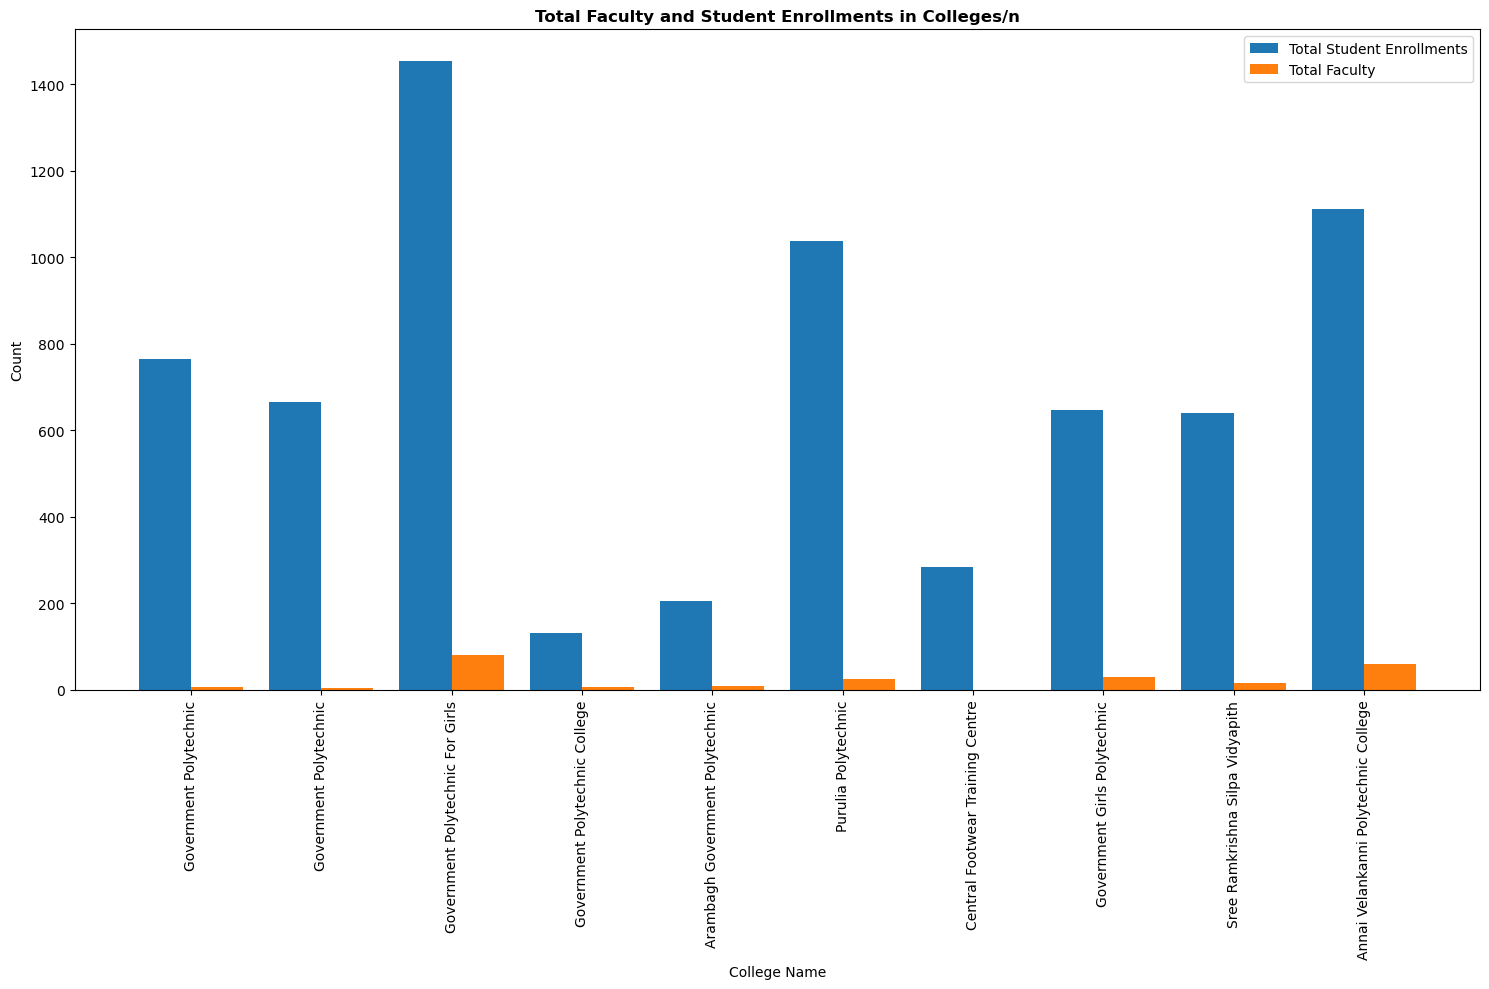

In [42]:
#BIVARIATE ANALYSIS
# Plotting the bar graph for subset_data which was analyse earlier with respect to Total Student Enrollments and Total Faculty
plt.figure(figsize=(15, 10))
bar_width = 0.4
index = range(len(subset_data))

plt.bar(index, subset_data['Total Student Enrollments'], width=bar_width, label='Total Student Enrollments')
plt.bar([i + bar_width for i in index], subset_data['Total Faculty'], width=bar_width, label='Total Faculty')

plt.xlabel('College Name')
plt.ylabel('Count')
plt.title('Total Faculty and Student Enrollments in Colleges/n',fontweight='bold')
plt.xticks([i + bar_width / 2 for i in index], subset_data['College Name'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

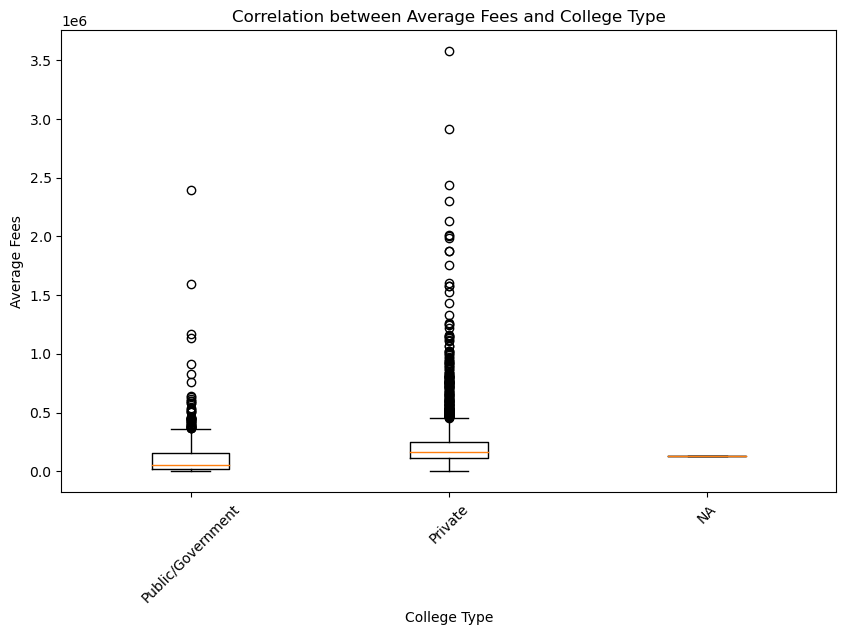

In [43]:
#BIVARIATE ANALYSIS
# Plotting the correlation between average fees and college type for detecting the outliers 
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['College Type'] == ct]['Average Fees'] for ct in data['College Type'].unique()], labels=data['College Type'].unique())
plt.title('Correlation between Average Fees and College Type')
plt.xlabel('College Type')
plt.ylabel('Average Fees')
plt.xticks(rotation=45)
plt.show()

In [44]:
# Correlation of columns contaning only numerical data type  
data.corr(numeric_only=True)


,Total Student Enrollments,Total Faculty,Established Year,Average Fees
Total Student Enrollments,1.000000,0.127156,0.007638,0.006465
Total Faculty,0.127156,1.000000,0.033707,0.224992
Established Year,0.007638,0.033707,1.000000,-0.003208
Average Fees,0.006465,0.224992,-0.003208,1.000000


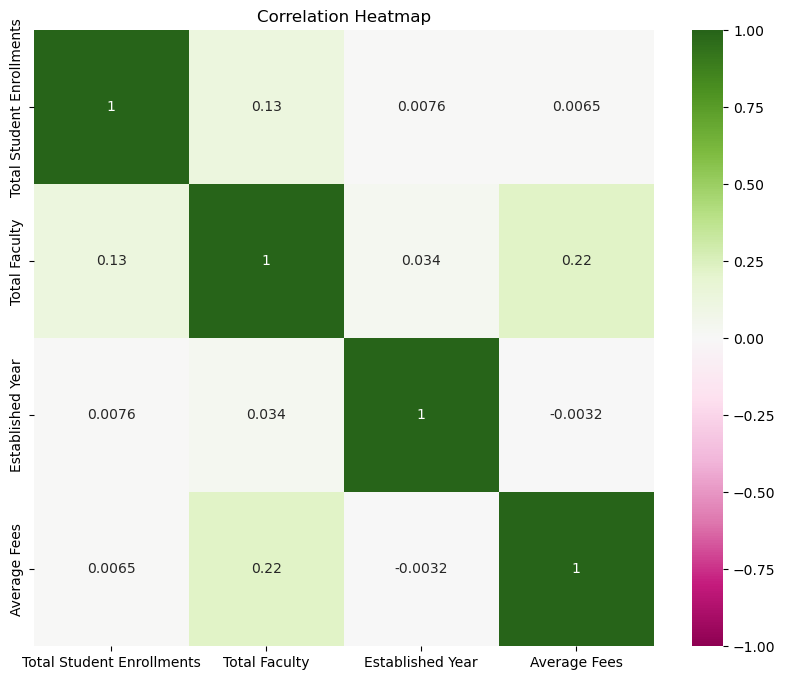

In [45]:
# Multivariate Analysis
# Correlation heatmap of every numerical column 
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True),annot=True, cmap='PiYG', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Pattern Identification ( Unsupervised )

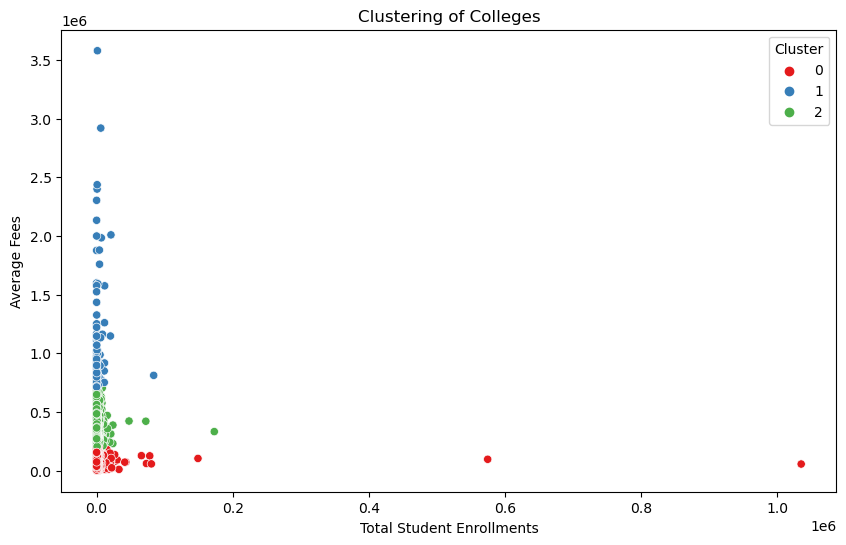

0    3573
2    1772
1      95
Name: Cluster, dtype: int64

In [46]:
#import all necessary libraries for Pattern Identification
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

#Clustering Analysis
# Select relevant features for clustering
features = ['Total Student Enrollments', 'Total Faculty', 'Average Fees', 'Established Year']
df_clustering = data[features]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(df_clustering)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Student Enrollments', y='Average Fees', hue='Cluster', data=data, palette='Set1')
plt.title('Clustering of Colleges')
plt.show()

#Cluster 0: Colleges with moderate enrollments and moderate fees.
#Cluster 1: Colleges with high enrollments and high fees.
#Cluster 2: Colleges with lower enrollments and lower fees.

cluster_counts = data['Cluster'].value_counts()
cluster_counts



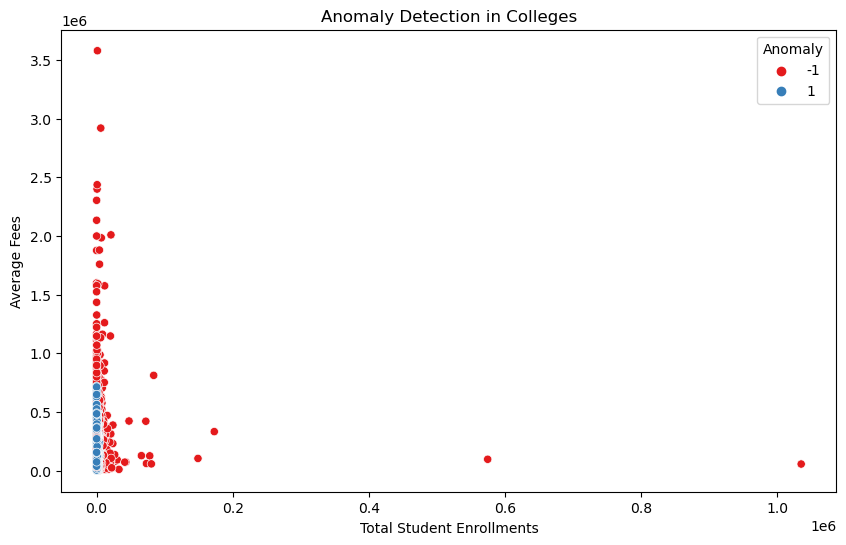

 1    4896
-1     544
Name: Anomaly, dtype: int64

In [47]:
#Anomaly Detection
# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.1)
data['Anomaly'] = iso_forest.fit_predict(data[features])


# Visualize the anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Student Enrollments', y='Average Fees', hue='Anomaly', data=data, palette='Set1')
plt.title('Anomaly Detection in Colleges')
plt.show()

 #Count the number of anomalies and normal points
anomaly_counts = data['Anomaly'].value_counts()
anomaly_counts

#-1: The data point is considered an anomaly (outlier).
#1: The data point is considered a normal observation (inlier).


# FEATURE ENGINEERING

In [48]:
# Create a new feature: Student-to-Faculty Ratio
data['StudentFacultyRatio'] = data['Total Student Enrollments'] / data['Total Faculty']
data.head()

,College Name,Genders Accepted,Total Student Enrollments,Total Faculty,Established Year,University,Courses,Facilities,City,State,Country,College Type,Average Fees,Cluster,Anomaly,StudentFacultyRatio
0,National Institute of Technology Rourkela,Co-Ed,4811.0,329.0,2007.0,NA,"B.Tech Mechanical Engineering, B.Tech Computer...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Rourkela,Odisha,India,Public/Government,350600.000000,2,-1,14.623100
1,Visvesvaraya National Institute of Technology ...,Co-Ed,1071.0,192.0,2007.0,NA,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Nagpur,Maharashtra,India,Public/Government,273596.666667,2,1,5.578125
2,Netaji Subhas University of Technology,Co-Ed,3759.0,101.0,2018.0,NA,"B.Tech Computer Engineering, B.Tech Electronic...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",New Delhi,Delhi,India,Public/Government,352320.000000,2,1,37.217822
3,Birla Institute of Technology,Co-Ed,4506.0,284.0,1955.0,NA,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Ranchi,Jharkhand,India,Private,596686.046512,2,-1,15.866197
4,International Institute of Information Technology,Co-Ed,1721.0,85.0,2001.0,NA,"B.Tech Computer Science and Engineering, M.Tec...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Hyderabad,Telangana,India,Private,756666.666667,1,-1,20.247059


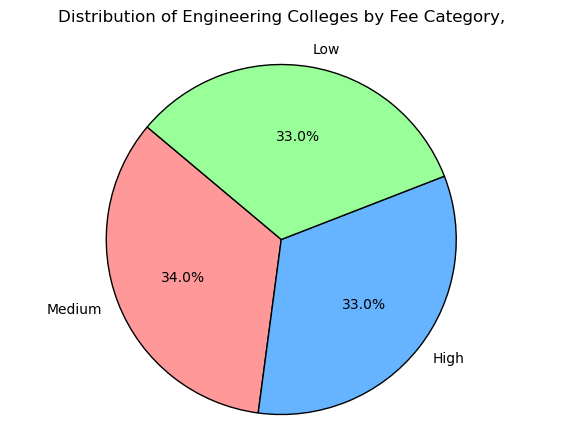

In [49]:
# Determine quantile thresholds for fee categories
low_threshold = data['Average Fees'].quantile(0.33)
high_threshold = data['Average Fees'].quantile(0.67)

# Categorize fees
def categorize_fee(fee):
    if fee <= low_threshold:
        return 'Low'
    elif fee <= high_threshold:
        return 'Medium'
    else:
        return 'High'

data['Fee Category'] = data['Average Fees'].apply(categorize_fee)

# Count the occurrences of each fee category
fee_category_counts = data['Fee Category'].value_counts()

# Plot pie chart for fee categories
plt.figure(figsize=(7, 5))
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(
    fee_category_counts,
    labels=fee_category_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribution of Engineering Colleges by Fee Category,\n')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


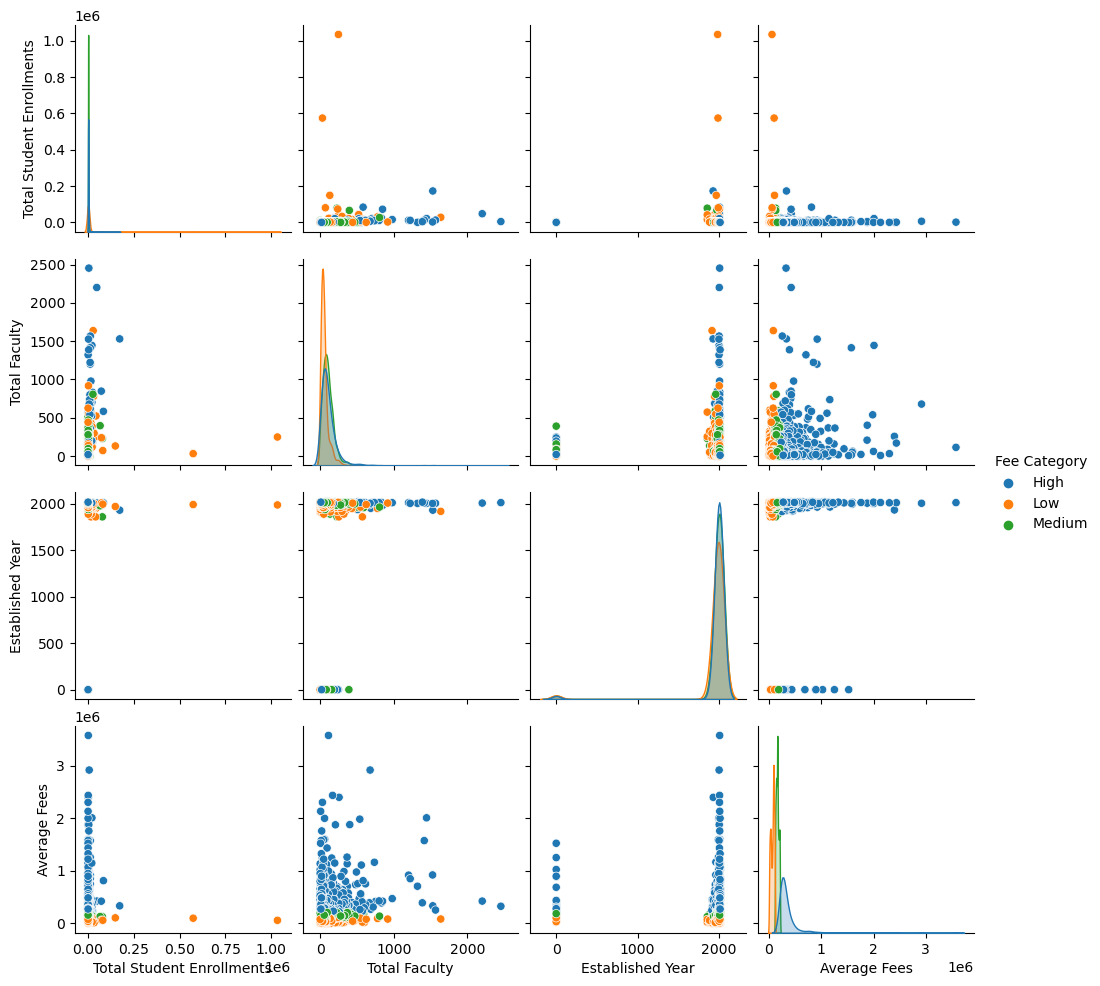

In [50]:
#MULTIVARIATE ANALYSIS
# Pairing the scatter plot of  numerical column
selected_vars = ['Total Student Enrollments', 'Total Faculty','Established Year','Average Fees']
sns.pairplot( data,vars=selected_vars,hue="Fee Category")
plt.show()

In [51]:
#IMPORTING  DATASET WITH FEATURES
data.to_csv('cleaned_engineering_colleges_in_India_with_features_for_model.csv', index=False, )

# Pattern Identification ( Supervised )



In [52]:
#Supervised learning is used for feature column which  was created by feature engineering

In [75]:
#import all necessary libraries for model generation 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_recall_curve 

# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['Genders Accepted', 'University', 'City', 'State', 'Country', 'College Type','StudentFacultyRatio']
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Prepare features and target
X = data.drop(['College Name', 'Courses', 'Facilities', 'Fee Category'], axis=1)
y = data['Fee Category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#RANDOM ROREST
# Train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)



Model Accuracy Of Random Forest: 99.90808823529412

 Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       393
         Low       1.00      1.00      1.00       356
      Medium       1.00      1.00      1.00       339

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088


Confusion Matrix:


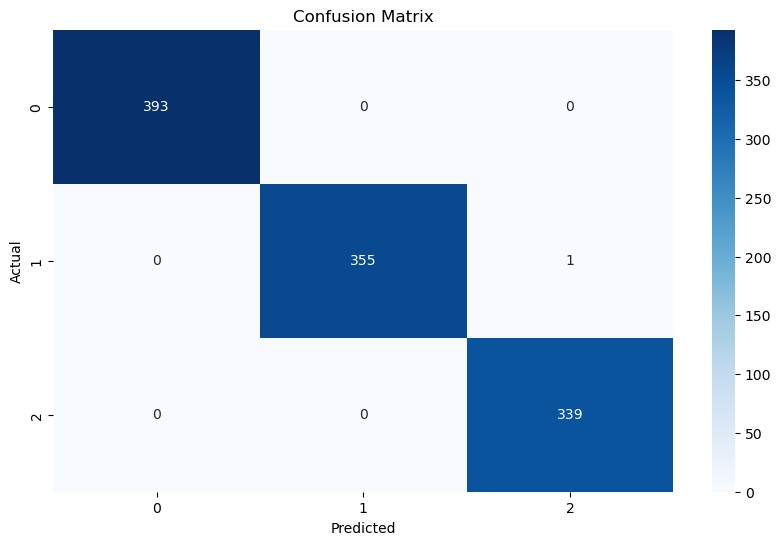

In [76]:
# Evaluate the model
print('Model Accuracy Of Random Forest:', accuracy_score(y_test, y_pred)*100)
print('\n Classification Report:')
print(classification_report(y_test, y_pred))

#CONFUSION MATRIX
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Top 5 Most Important Features:
          feature  importance
9    Average Fees    0.593752
10        Cluster    0.265094
4      University    0.051060
2   Total Faculty    0.024259
6           State    0.013953


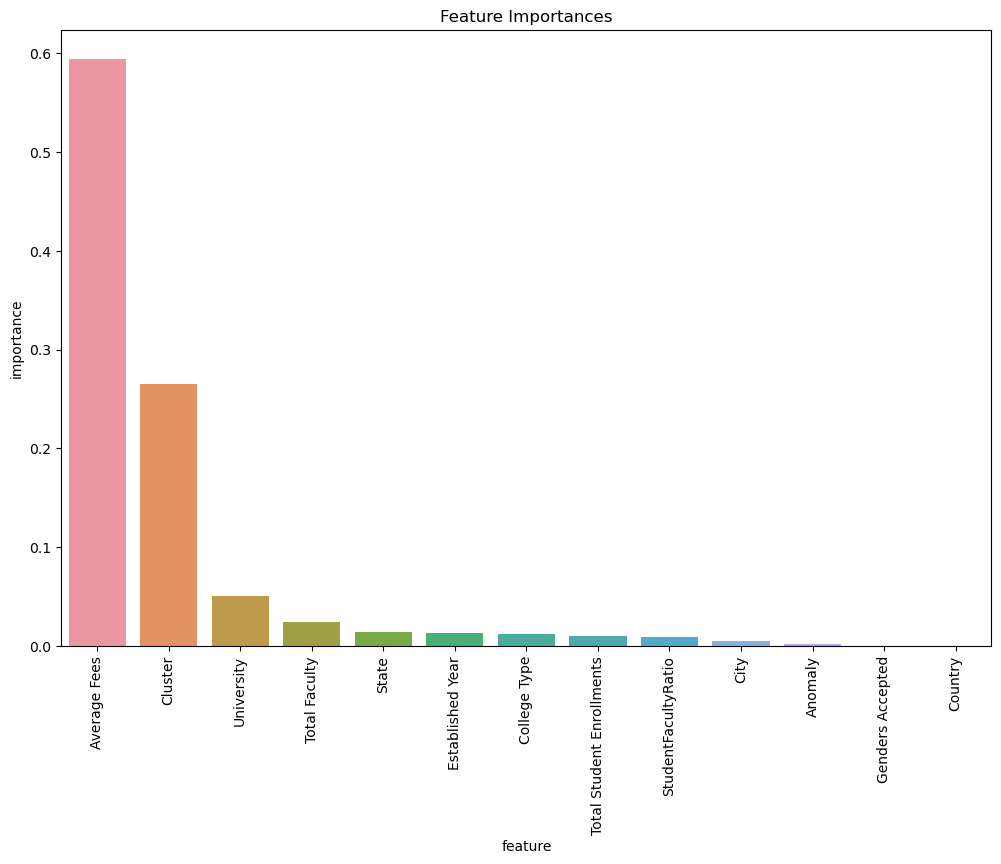

In [77]:
# Get feature importances
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print('\
Top 5 Most Important Features:')
print(feature_importance.head())

#PLOT FEATURE IMPORTANCE
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='importance', data=feature_importance)
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()




In [78]:
# Analyze the model's predictions
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Fee Categories:")
print(comparison_df.head(10))  # Display the first 10 comparisons


Actual vs Predicted Fee Categories:
      Actual Predicted
1187    High      High
4767    High      High
410     High      High
5018     Low       Low
2709     Low       Low
908     High      High
3760     Low       Low
4812  Medium    Medium
5125     Low       Low
530     High      High


In [68]:
# Function to predict fee category for a given college
def predict_fee_category(college_data):
    return rf_classifier.predict(college_data.reshape(1, -1))[0]

# Example: Predict fee category for the first college in the test set
example_college = X_test.iloc[0]
predicted_category = predict_fee_category(example_college.values)
print('\
Example Prediction:')
print(f'Predicted Fee Category: {predicted_category}')
print(f'Actual Fee Category: {y_test.iloc[0]}')

print('done')

# Analyze misclassifications
misclassifications = comparison_df[comparison_df['Actual'] != comparison_df['Predicted']]
print("\nMisclassifications:")
print(misclassifications)

Example Prediction:
Predicted Fee Category: High
Actual Fee Category: High
done

Misclassifications:
     Actual Predicted
2183    Low    Medium


In [69]:
#DECISION TREE
#Train the model using Decision Trees
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

print(y_pred)
# Evaluate the model
print('Model Accuracy Of Decision Tree:', accuracy_score(y_test, y_pred)*100)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

['High' 'High' 'High' ... 'High' 'Medium' 'High']
Model Accuracy Of Decision Tree: 99.90808823529412

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       393
         Low       1.00      1.00      1.00       356
      Medium       1.00      1.00      1.00       339

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088



In [70]:
# Get feature importances
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print('Top 5 Most Important Features:')
print(feature_importance.head())

# Function to predict fee category for a given college
def predict_fee_category(college_data):
    return dt_classifier.predict(college_data.reshape(1, -1))[0]

# Example: Predict fee category for the first college in the test set
example_college = X_test.iloc[23]
predicted_category = predict_fee_category(example_college.values)
print('\nExample Prediction:')
print(f'Predicted Fee Category: {predicted_category}')
print(f'Actual Fee Category: {y_test.iloc[23]}')
print('done')

Top 5 Most Important Features:
                     feature  importance
9               Average Fees         1.0
0           Genders Accepted         0.0
1  Total Student Enrollments         0.0
2              Total Faculty         0.0
3           Established Year         0.0

Example Prediction:
Predicted Fee Category: Low
Actual Fee Category: Low
done


In [71]:
#SUPPORT VECTOR MACHINE
# Train the model using SVM Classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

print(y_pred)
# Evaluate the model
print('Model Accuracy Of SVM:', accuracy_score(y_test, y_pred)*100)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))



['High' 'High' 'High' ... 'High' 'Medium' 'High']
Model Accuracy Of SVM: 99.90808823529412

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       393
         Low       1.00      1.00      1.00       356
      Medium       1.00      1.00      1.00       339

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088



In [72]:
# Get feature importances
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print('Top 5 Most Important Features:')
print(feature_importance.head())

# Function to predict fee category for a given college
def predict_fee_category(college_data):
    return svm_classifier.predict(college_data.reshape(1, -1))[0]

# Example: Predict fee category for the first college in the test set
example_college = X_test.iloc[1]
predicted_category = predict_fee_category(example_college.values)
print('\nExample Prediction:')
print(f'Predicted Fee Category: {predicted_category}')
print(f'Actual Fee Category: {y_test.iloc[1]}')
print('done')

Top 5 Most Important Features:
                     feature  importance
9               Average Fees         1.0
0           Genders Accepted         0.0
1  Total Student Enrollments         0.0
2              Total Faculty         0.0
3           Established Year         0.0

Example Prediction:
Predicted Fee Category: High
Actual Fee Category: High
done


In [73]:
# we will use Random forest for final  model traning as it has good distribution of feature importance
import pickle

# Save the model to a pickle file
with open('admission_model.pkl', 'wb') as file:
    pickle.dump(rf_classifier , file)
